<a href="https://colab.research.google.com/github/Anushka31raut/Practicalandlab/blob/main/UGMR_2023_Module4_Lab1_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



Name : Anushka Raut

Ugmr Id: ugmr20230025@ihub-data.iiit.ac.in

20230025

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [ ]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

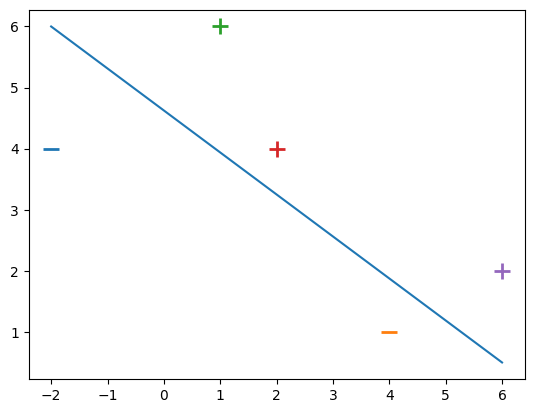

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

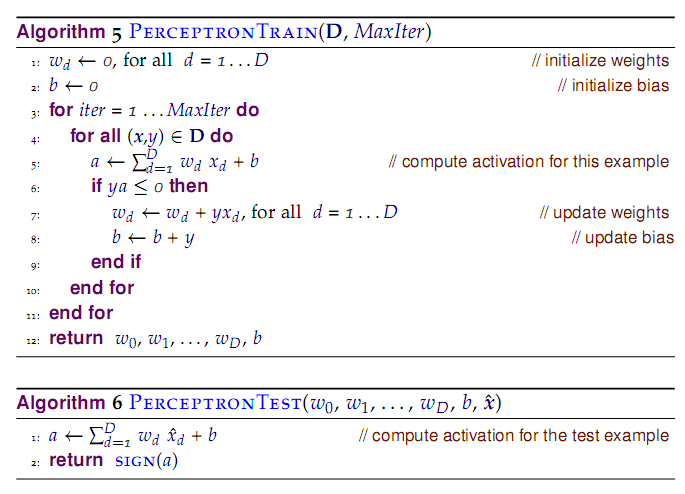

The algorithm is shown in the above image.

In [ ]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [ ]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

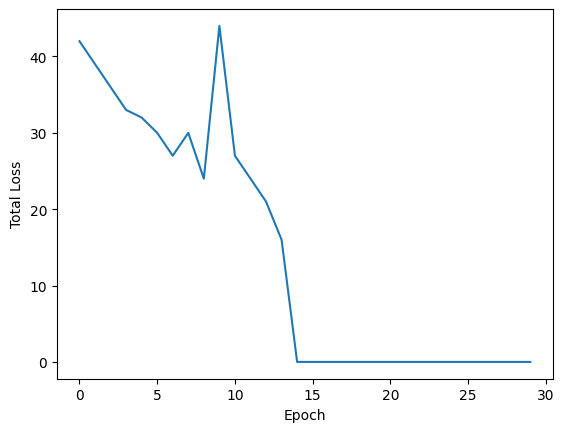

In [ ]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

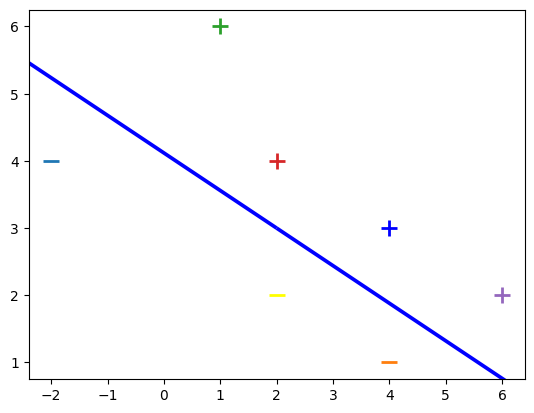

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


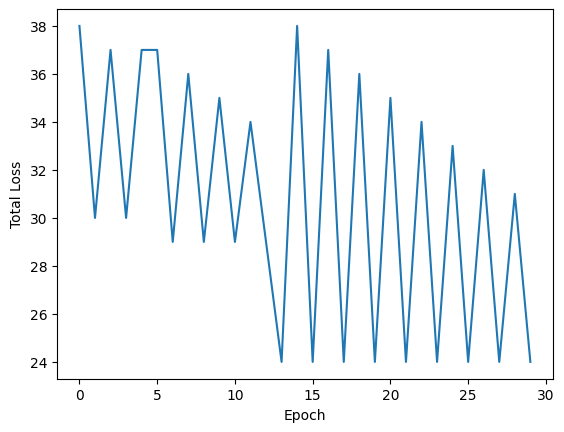

In [ ]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

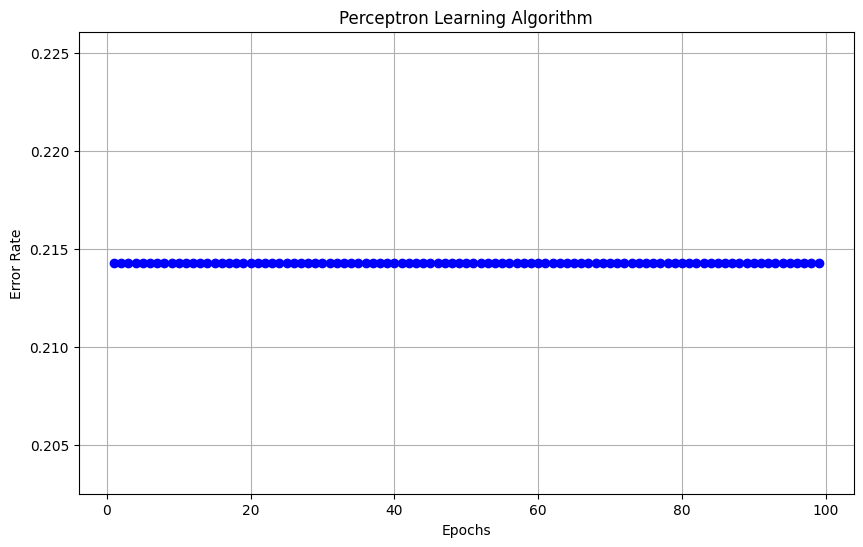

In [6]:
#Ans 1:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
names = [f"Feature_{i}" for i in range(60)] + ['Label']
sonar_data = pd.read_csv(url, header=None, names=names)
sonar_data['Label'] = sonar_data['Label'].map({'M': 1, 'R': 0})
X = sonar_data.drop('Label', axis=1)
y = sonar_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Perceptron(max_iter=100, eta0=0.1, random_state=42)
errors = []
for i in range(1, 100):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    errors.append(np.mean(y_pred != y_test))
plt.figure(figsize=(10, 6))
plt.plot(range(1, 100), errors, marker='o', linestyle='-', color='b')
plt.title('Perceptron Learning Algorithm')
plt.xlabel('Epochs')
plt.ylabel('Error Rate')
plt.grid()
plt.show()

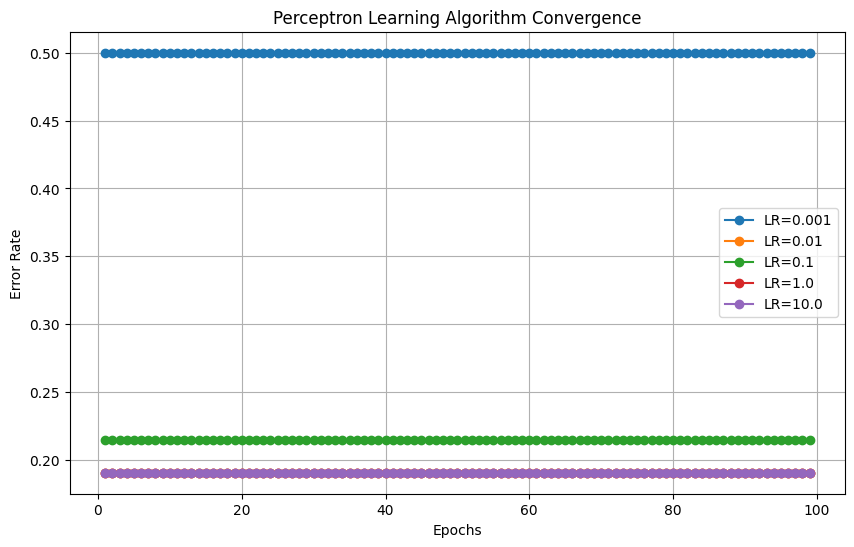

In [5]:
#Ans 2:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
names = [f"Feature_{i}" for i in range(60)] + ['Label']
sonar_data = pd.read_csv(url, header=None, names=names)
sonar_data['Label'] = sonar_data['Label'].map({'M': 1, 'R': 0})
X = sonar_data.drop('Label', axis=1)
y = sonar_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
learning_rates = [0.001, 0.01, 0.1, 1.0, 10.0]
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    model = Perceptron(max_iter=100, eta0=lr, random_state=42)
    errors = []
    for i in range(1, 100):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        errors.append(np.mean(y_pred != y_test))
    plt.plot(range(1, 100), errors, marker='o', linestyle='-', label=f'LR={lr}')
plt.title('Perceptron Learning Algorithm Convergence')
plt.xlabel('Epochs')
plt.ylabel('Error Rate')
plt.legend()
plt.grid()
plt.show()

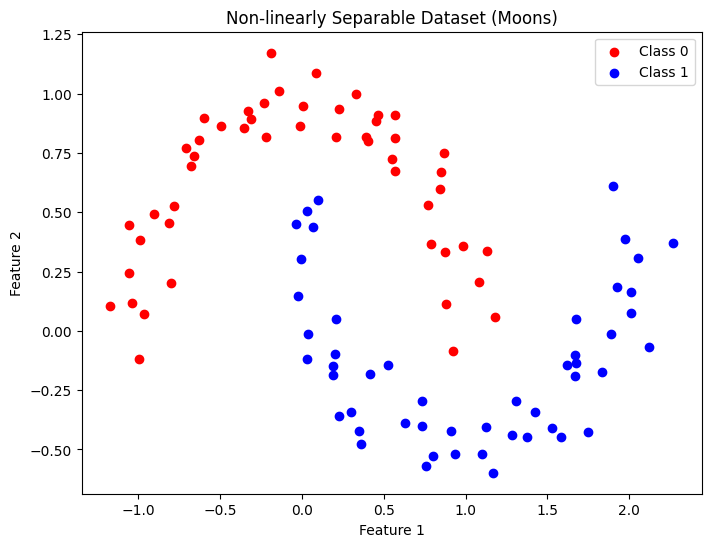

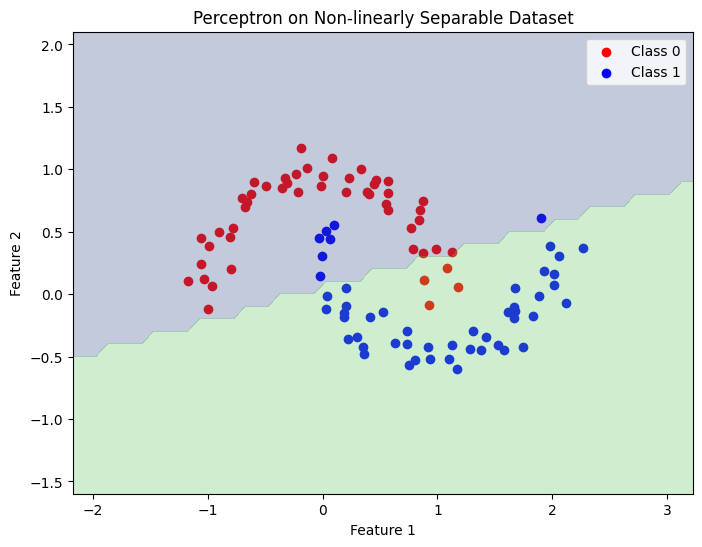

In [4]:
#Ans 3:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import Perceptron
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('Non-linearly Separable Dataset (Moons)')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
model = Perceptron(max_iter=1000, random_state=42)
model.fit(X, y)
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('Perceptron on Non-linearly Separable Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, levels=np.array([-1, 0, 1]))

plt.legend()
plt.show()

Ans 3:

Observations:

1. The generated dataset consists of two moon-shaped classes that are not linearly separable.

2. When we train the Perceptron algorithm on this dataset, it tries to find a linear decision boundary to separate the classes.

3. As a result, the Perceptron algorithm fails to capture the non-linear nature of the data and draws a linear decision boundary. It cannot correctly classify the non-linearly separable dataset.

3. The decision boundary produced by the Perceptron is limited to a linear form, which cannot adequately separate the two classes in this case.